# <center>2018 Elections - Progressive Victories in the Democratic primaries</center>
### <center>Udacity Data Analysis Nano-Degree / by Aviad Giat</center>
![Progressive wins in the 2018 Democratic primaries](lib-pro-wsj.jpg "Progressive wins")
Image source: Wall Street Journal

## Investigation Overview
In this analysis I will look into the 2018 Democratic primaries elections' statistics and find how the progressive movement's candidates did with winning (or losing) the combats. I will also try to find outstanding data about those elections and investigate them deeper if I find them interesting for the common knowledge. <font color="#63BDEF">►</font><br>

### Main assumption
Progressive pacs in the 2018 Democratic primaries did better with winning primaries than non-Proressive pacs, compare to their size in the races. <font color="#63BDEF">►</font>

## Dataset Overview
The main dataset I used for this analysis has 1379 observations (rows) representing the 2018 Democratic primaries elections' candidates and 15 variables (columns) with information about each observation, like their state, endorsements, if they are progressive, etc. More about the dataset and the preliminary wrangling can be found in the Exploration1 file. <font color="#b4c93e">▼</font>

### Dataset Sources
I obtained the main dataset used in this analysis from Five Thirty Eight's <a target="_blank" href="https://github.com/fivethirtyeight/data/tree/master/primary-candidates-2018">Github repository</a>.<br>
I also added completing data from other sources, like <a target="_blank" href="https://ballotpedia.org/Endorsements_by_Joe_Biden">Ballotpedia</a>, to acheive better and more accurate analysis. More information about them in the [Exploration1](Exploration1.ipynb) file, under [Add missing Guns Sense endorsements](Exploration1.ipynb#Add-missing-Guns-Sense-endorsements) and under [Add Bernie Sanders and Joe Biden missing endorsements](Exploration1.ipynb#Add-Bernie-Sanders-and-Joe-Biden-missing-endorsements). <font color="#63BDEF">►</font>

## <center>What makes Progressives, progressives? <font color="#b4c93e">▼</font></center>
![alt text](progressives.jpg "Title")
Image by: J. Scott Applewhite-AP

Progressive candidates do not accept contributions from big donors, whereas other candidates collect contribution from corporations, like Big Pharma, the Armament Insdustry, Big Oil, etc. <br>
Pacs that support ONLY progressive candidates are: "Our Revolution", "Justice Democrats" and "PCCC" (Progressive Change Campaign Committee), thus their candidates were marked here as "Progressives". <font color="#63BDEF">►</font>

In [744]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display_html
from IPython.html import widgets
from IPython.core.display import display, HTML
import plotly 
plotly.tools.set_credentials_file(username='AviG', api_key='6XMlVYzt98Zt9xJbuEtc')
# init_notebook_mode(connected=True)

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

plt.rcParams.update({'font.size': 22})

In [745]:
%%html
<style>.output_wrapper, .output {height:auto !important; max-height:10000px;
                                }.output_scroll {box-shadow:none !important; webkit-box-shadow:none !important;}</style>

In [746]:
# load in the dataset into a pandas dataframe
dem = pd.read_csv('dem.csv')

## <font color='85ad0c'>Pacs and major endorsers in this project ▼</font>

In [747]:
endorsers = pd.read_csv('endorsers.csv')

# Function to make clickable links
def make_clickable(val):
    return '<a target="_blank" href="{}">{}</a>'.format(val,val)
display(HTML('<div align="center"><font color="#63BDEF">►</font></div>'))
# Show html table
(endorsers.style
 .format(make_clickable, subset='Link')
 .apply(lambda x: ['background: #cae0a8' if x.name in [0,1,2] else 'background: #ffffff' for i in x], axis=1))


,Pac / Endorser,Link,Progressive?
0,Justice Democrats,https://www.justicedemocrats.com,Yes
1,Our Revolution,https://ourrevolution.com/about,Yes
2,PCCC,http://boldprogressives.org/about,Yes
3,Indevisible,https://www.indivisible.org,No
4,Working Families,http://workingfamilies.org/about-us,No
5,Dem Party Support,https://redtoblue.dccc.org/,No
6,Emily,https://www.emilyslist.org/pages/about-us,No
7,Gun Sense,https://momsdemandaction.org/about/,No
8,Votes Vets,https://www.votevets.org/about,No
9,Biden Endorsed,https://ballotpedia.org/Endorsements_by_Joe_Biden,No


## <font color='85ad0c'>Distribution of the Endorsements</font>
Who endorsed the highest number of candidates? <font color="#b4c93e">▼</font>


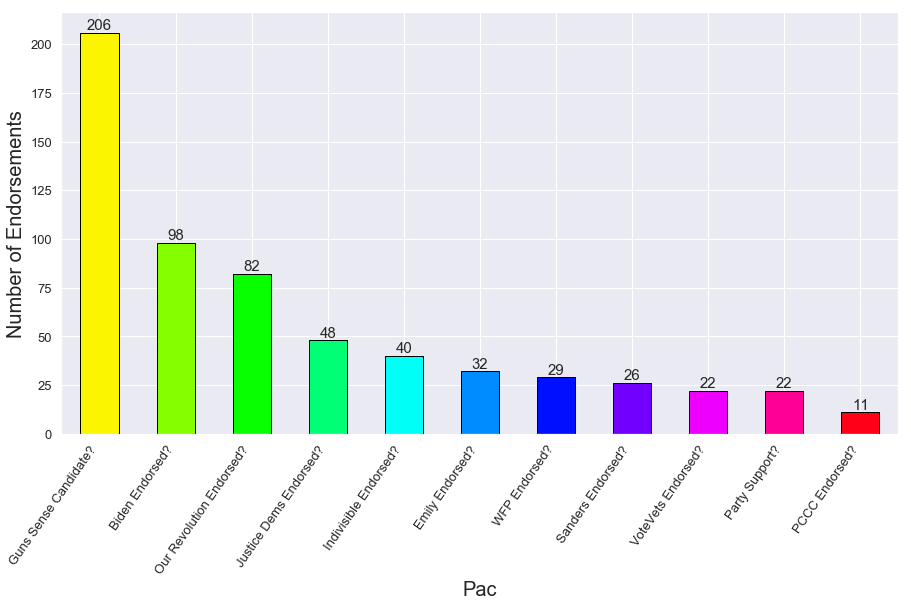

In [748]:
## from matplotlib import cm
y = np.array([2,3,4,5,6,7,8,9,10,11,12])
colors = cm.hsv(y / float(max(y)))

fig, ax = plt.subplots(figsize=(15,6))
endors_yes1 = dem[dem['Endorsements'] != 'No']

s = endors_yes1['Endorsements'].value_counts()
ax = s.plot.bar(color = colors, edgecolor='black') 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Endorsements + 0.2 , v.Endorsements,
        verticalalignment='bottom', horizontalalignment='center', fontsize=15)
plt.subplots_adjust(top = 1.1 )

plt.xticks(rotation = 55)
# plt.title("2018 Democratic Endorsements Distribution", fontdict = {'fontsize' : 30})
display(HTML('<h3><font color="85ad0c">2018 Democratic Endorsements Distribution <font color="#b4c93e">▼</font></h3>'))
plt.xlabel("Pac", size=20)
plt.ylabel("Number of Endorsements", size=20)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.tick_params(labelsize=13)

plt.show()

The pac with the highest number of endorsements is Guns Sense, which endorsed 206 candidates. Guns Sense is an a-political and a non-partisan organization, which might shade light on why it had so many endorsements.<br>
Joe Biden had 98 endorsements in second place, followed by the Progressive pac Our Revolution with 82 endorsements.<br>
The last pac in the bar chart above is the PCCC with 11 endorsements. PCCC does not endorse, as a principal, more than 15 candidates at an election cycle and it was established in 2009.<br>
The Democratic Party Support is not ranked high in this list (2nd from the bottom). They endorsed only 22 candidates. I would think that the party itself would have more candidates endored in order to expend their reach, but I guess their strategy on that is different. Let's see how many candidates each pac won with now and what was their percent of success from all the candidates a pac endorsed. <font color="#b4c93e">▼</font>

## <font color='85ad0c'>Endorsements and Won</font>
How many winnings each pac had and what was their success rate? <font color="#b4c93e">▼</font>

In [749]:
# Find all endorsements for each pac
endors_yes = dem[dem['value'] == 'Yes']
endors_yes = dem['Endorsements'].value_counts()

# # Find number of successful endorsements for each pac
endors_yes_won = dem[(dem['Won'] == 'Yes') & (dem['Endorsements'] != 'No')]
endors_yes_won = endors_yes_won['Endorsements'].value_counts()

# # Find the number of successes for each endorsing pac
endors_success = round(endors_yes_won / endors_yes * 100, 1).sort_values(ascending=False)

# # Endorsers Success table
# # Create an empty data frame with just desired column names
success = pd.DataFrame(columns = ['Percent Success', 'Winnings', 'Endorsements'])

# # Put series value inside data frame using mapping concept
success['Percent Success'] = endors_success
success['Winnings'] = endors_yes_won
success['Endorsements'] = endors_yes

# Drop NA line
success = success.dropna()

# Name the index column
success.index.name = 'Pac'

# reset the index
success.reset_index(inplace = True)
display(HTML('<h3><font color="85ad0c">Success Rate <font color="#b4c93e">▼</font></h3>'))

# Print table
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #85ad0c' if v else '' for v in is_max]
success.style.apply(highlight_max, subset=['Percent Success','Winnings', 'Endorsements'])


,Pac,Percent Success,Winnings,Endorsements
0,Party Support?,90.9,20,22
1,PCCC Endorsed?,63.6,7,11
2,Biden Endorsed?,63.3,62,98
3,Indivisible Endorsed?,60,24,40
4,Emily Endorsed?,53.1,17,32
5,WFP Endorsed?,48.3,14,29
6,Guns Sense Candidate?,45.6,94,206
7,VoteVets Endorsed?,45.5,10,22
8,Sanders Endorsed?,38.5,10,26
9,Justice Dems Endorsed?,31.2,15,48


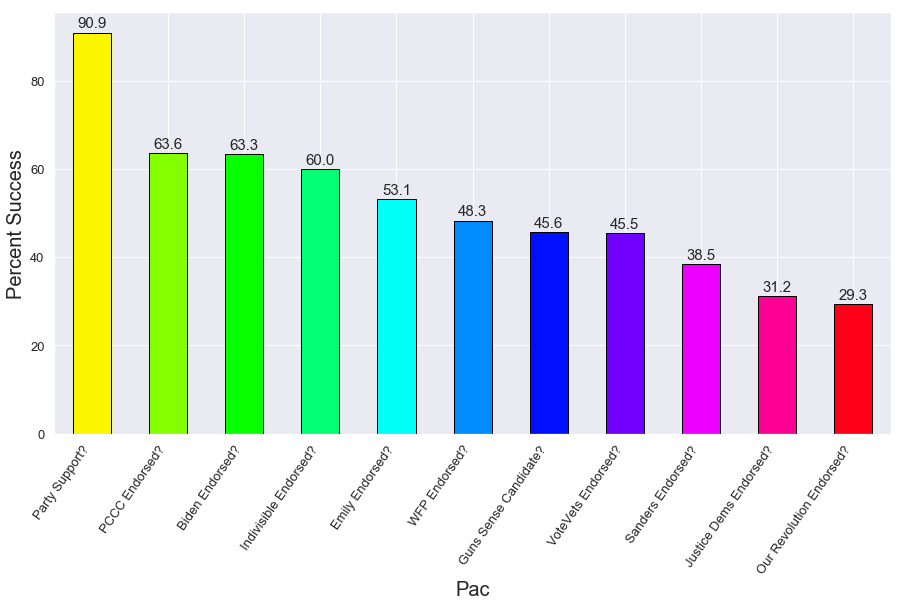

In [750]:
## from matplotlib import cm
y = np.array([2,3,4,5,6,7,8,9,10,11, 12])
colors = cm.hsv(y / float(max(y)))
display(HTML('<h3><font color="85ad0c">Endorsers Success Rate (in %) <font color="#b4c93e">▼</font></h3>'))

fig, ax = plt.subplots(figsize=(15,6))
endors_yes1 = success

s = endors_yes1['Percent Success']
ax = s.plot.bar(color = colors, edgecolor='black') 

for i, v in s.reset_index().iterrows():
    ax.text(i, v['Percent Success'] + 0.4 , v['Percent Success'],
        verticalalignment='bottom', horizontalalignment='center', fontsize=15)
plt.subplots_adjust(top = 1.1 )
# ax.set_xticks(success['Pac'])
ax.set_xticklabels(success['Pac'])
plt.xticks(rotation = 55)
plt.xlabel("Pac", size=20)
plt.ylabel("Percent Success", size=20)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.tick_params(labelsize=13)

plt.show()

Endorsements by the Democratic party almost always ended up in a win, with 90% success rate!
The PCCC and Joe Biden ended up with about 63% success rate, while Bernie Sanders, Justice Democrats and Our Revolution ended up with less than 40%. Guns Sense, despite having the highest numbers of endorsements and winnings, ended up with 46% success rate. 
Were these success rates correlated to the number of endorsements a pac had? <font color="#b4c93e">▼</font>

<Figure size 1008x720 with 0 Axes>

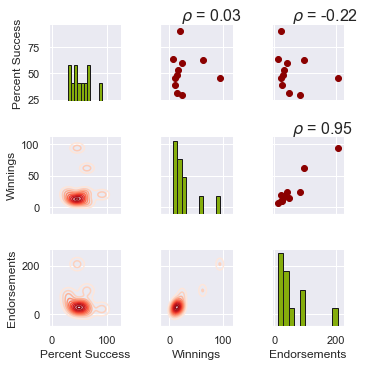

In [751]:
display(HTML('<h3><font color="85ad0c">Endorsements & Success Rate Correlation<font color="#b4c93e">▼</font></h3>'))

# print(success.corr())
plt.figure(figsize=(14,10));

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca();
    ax.annotate(label, xy = (0.28, 1.05), size = 16, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sb.PairGrid(data= success, height = 1.8)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sb.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 11, edgecolor =  'k', color = '#85ad0c')
plt.show();

We can see that there is a strong correlation between winnings and endorsements (almost 1, which is absolute correlation). This can be used as a tactic for endorsers who want to bring in many candidates. Endorse many and few will fall in. Maybe that's what Guns Sens, Biden, Our Revolution and Justice Democrats excatly did with their high numbers of endorsements?
We can also see above that the correlation between the success and both winnings and endorsements is very week.
So, we wouldn't be able to project the success rate for winning the primaries based on the number of endorsements a pac had. We can definitely say that, according to the above data, from only the last primaries, having the Party's endorsement is having the best probability to succeed in the Democratic primaries.<br>
Let's take a closer look at the correlation between Endorsements and Winnings. <font color="#b4c93e">▼</font>

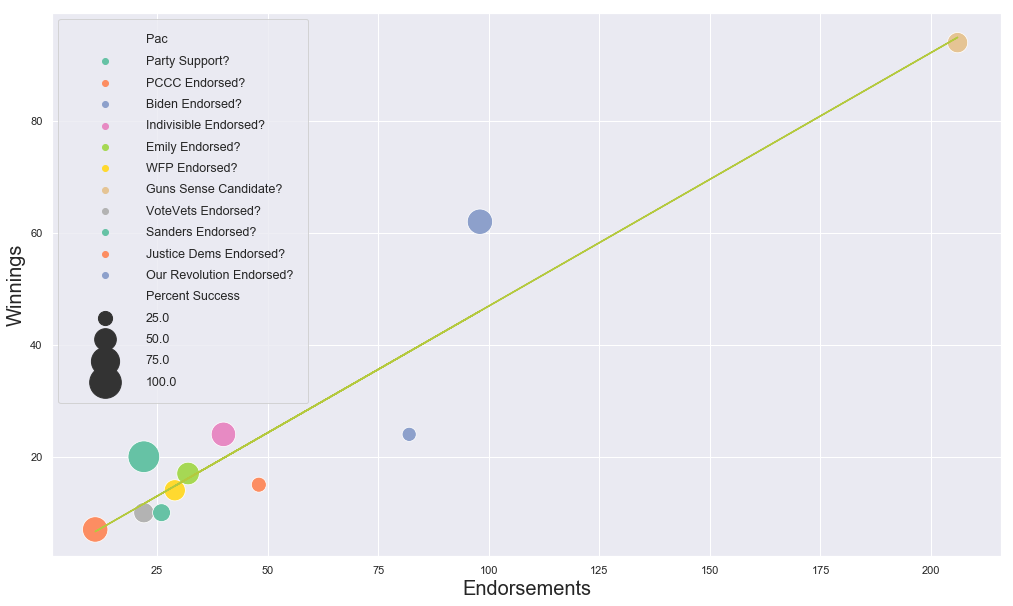

In [752]:
display(HTML('<h3><font color="85ad0c">A closer look at the above correlation <font color="#b4c93e">▼</font></h3>'));

sb.set(style="darkgrid")
# Scatterplot comparing the 3 variables above
fig, ax = plt.subplots(figsize=(17,10))
ax = sb.scatterplot(x='Endorsements', y = 'Winnings', data = success, hue = 'Pac',
                   size="Percent Success", palette="Set2", sizes=(200, 1000), legend='brief')
ax.legend(loc='upper left', labelspacing=0.75, handlelength=5, borderpad=1.2, prop={'size':12.5})
plt.xlabel("Endorsements", size=20)
plt.ylabel("Winnings", size=20);

from sklearn.linear_model import LinearRegression
X = success.Endorsements.values.reshape(-1, 1)  # values converts it into a numpy array
Y = success.Winnings.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, color='#b4c93e')


#      ax.text(success.Endorsements[line]+0.01, success.Winnings[line], 
#      success.Pac[line], ha='center', va = 'bottom', 
#      size=20, color='black', weight='semibold')



In [753]:
# source: https://365datascience.com/linear-regression/#wp-video-lightbox/27/
from scipy.stats import linregress
import statsmodels.api as sm

# Find the linear regression
# print(linregress(success.Endorsements, success.Winnings))

y = success.Winnings
x1 = success.Endorsements
x = sm.add_constant(x1) #(b0)
results = sm.OLS(y,x).fit()
results.summary()

# Predict how many winnings 500 endorsements will bring to a pac
# ŷ = β0+ β1* x
# β0 and β1 were taken from the statsmodels ordinary least squares regression (OLS)
ŷ = 1.6378 + 0.4529 * 500
# ŷ

We can see above the almost perfect correlation between the two variables. The size of the circles grows as the third variable record increases. That is the Success Rate of the pac. In this scatter plot it is easier to see the outliers, like Guns Sense, Joe Biden and Our Revolution.<br>
Theoretically, this means that if a pac endorses 500 candidates, they will have 228 winnings. <br>
So, how many winnings Progressive pacs had? I'll answer that under the "Distribution of the Progressive candidates" slide (2 slides ahead). <font color="#63BDEF">►</font>

## <font color='e09c4a'>Candidates Distribution</font>
How many times candidates were endorsed? <font color="#b4c93e">▼</font>

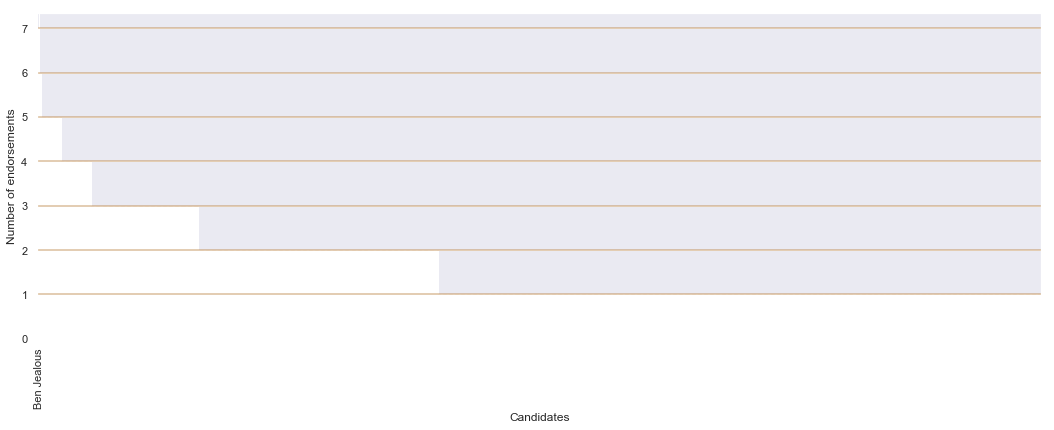

In [754]:
display(HTML('<h3><font color="#e09c4a">Candidates Distribution <font color="#b4c93e">▼</font></h3>'));

plt.figure(figsize=(18,6))

dem['Candidate'].value_counts().plot(kind = "bar", color="#e09c4a")
plt.axhline(y=1, color='#b77a35', alpha=0.5)
plt.axhline(y=2, color='#b77a35', alpha=0.5)
plt.axhline(y=3, color='#b77a35', alpha=0.5)
plt.axhline(y=4, color='#b77a35', alpha=0.5)
plt.axhline(y=5, color='#b77a35', alpha=0.5)
plt.axhline(y=6, color='#b77a35', alpha=0.5)
plt.axhline(y=7, color='#b77a35', alpha=0.5)
plt.xticks([1])
plt.xlabel("Candidates")
plt.ylabel("Number of endorsements")
plt.show()



Some candidates were endorsed by more than one pac. When grouping by number of endorsements, we can see in the above distribution that candidates endorsed by one pac had the highest number of occurences, and as the number of endorsements went up, less candidates can be seen, up to 7 endorsements to 1 candidate.<br>
Ben Jealous from Maryland was the most 'popular' candidate with 7 appearcens in the database (7 different endorsements). He did win the primary, but lost in the general election to the incumbent governor, Republican Larry Hogan.<br>
Brent Welder from Kansas, Abdul El-Sayed from Michigan and Dana Balter from New York, all received 6 endorsements and all were supported by Progressive pacs. <br>
Next, I will zoom in the above plot and see if there are any familiar names at the list of candidates who had max amount of endorsements. <font color="#b4c93e">▼</font>

## <font color='e09c4a'>Candidate and Endorsements</font>
Who were the most popular candidates for pacs? <font color="#b4c93e">▼</font>

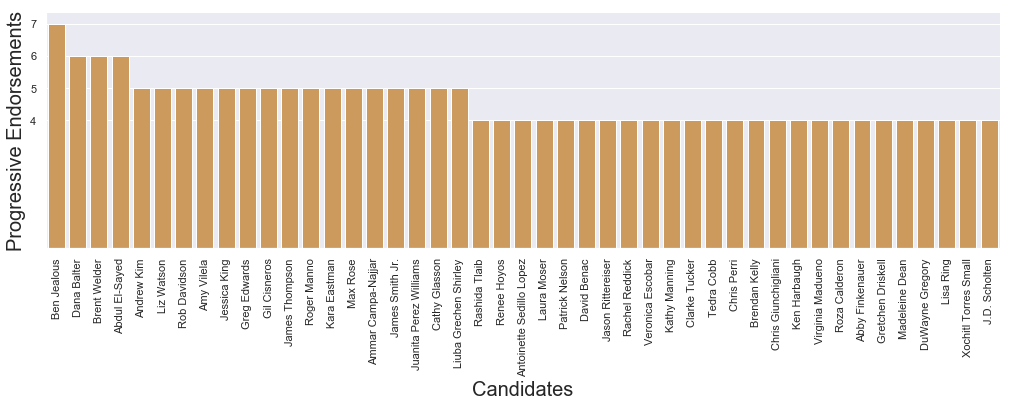

In [755]:
# Candidates
top_candidates = dem[['Candidate', 'Endorsements']]
top_candidates = top_candidates.groupby(['Candidate']).count()
top_candidates = top_candidates.sort_values(['Endorsements'], ascending=False).reset_index()

# print(top_candidates['Candidate'].count(), "Top candidates participated in the primaries throughout the states. \n\033[33m\033[1m(Here are the first 10 by name)\033[0m")
# print(top_candidates.head(10))
display(HTML('<h3><font color="85ad0c">Top candidates with more than 4 endorsements <font color="#b4c93e">▼</font></h3>'));

# Top 20 Progressive candidates
top_candidates_plot = top_candidates
top_candidates_plot = top_candidates_plot.head(45)
top_candidates_plot = sb.catplot(x="Candidate", y="Endorsements", color="#e09c4a", data=top_candidates_plot, kind='bar');
top_candidates_plot.fig.set_size_inches(18,4)
# plt.title("Progressive candidates with more than 1 endorsement")
plt.xticks(rotation = 90);
plt.yticks([4,5,6,7], rotation = 0);
plt.xlabel("Candidates", size=20)
plt.ylabel("Progressive Endorsements", size=20);


Ben Jealous, a Progressive candidate, was the 'star' of these primaries with 7 endorsements! He was Followed by Dana Balter, Brent Welder and Abdul El Sayed, whom all are Progressives, with 6 endorsements each. With 5 endorsements there were 13 Progessive out of 16 candidates. That is 81% Progressive in this distribution slot of 5 endorsements. Now, who were the leading Progressive candidates? <font color="#b4c93e">▼</font>

## <font color='e09c4a'>Candidate and Progressives</font>
How many candidates were Progressive and who were the most popular ones for pacs within the Progressive pacs? <font color="#b4c93e">▼</font>

105 Progressive candidates participated in the primaries throughout the states. 
(Here are the ones with more than 2 endorsement, only from Progressive pacs)
        Candidate  Endorsements
0  Abdul El-Sayed             3
1    Brent Welder             3
2   Rashida Tlaib             3


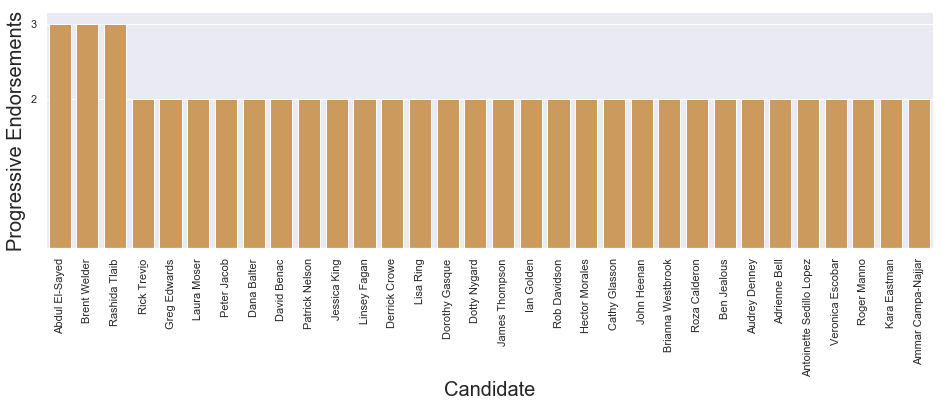

In [756]:
# Create a new dataframe
top_can_end = dem[['Candidate', 'Endorsements', 'Progressive']]
top_can_end = top_can_end[top_can_end['Progressive'] == 'Yes']
del top_can_end['Progressive']
top_can_end = top_can_end.groupby(['Candidate']).count()
top_can_end = top_can_end.sort_values(['Endorsements'], ascending=False).reset_index()
# top_can_2_plus = top_can_end.sort_values(['Endorsements'], ascending=False).reset_index()

print(top_can_end['Candidate'].count(), "Progressive candidates participated in the primaries throughout the states. \n\033[33m\033[1m(Here are the ones with more than 2 endorsement, only from Progressive pacs)\033[0m")
print(top_can_end.head(3))
display(HTML('<h3><font color="85ad0c">Progressive candidates with more than 1 endorsement <font color="#b4c93e">▼</font></h3>'));

# Top 20 Progressive candidates
top_can_plot = top_can_2_plus
top_can_plot = top_can_plot.head(32)
top_can_plot = sb.catplot(x="Candidate", y="Endorsements", color="#e09c4a", data=top_can_plot, kind='bar');
top_can_plot.fig.set_size_inches(18,4)
# plt.title("Progressive candidates with more than 1 endorsement")
plt.xticks(rotation = 90);
plt.yticks([2,3], rotation = 0);
plt.xlabel("Candidate", size=20)
plt.ylabel("Progressive Endorsements", size=20);


From the 105 Progressive cadidtes in the 2018 Democratic primaries, the 3 top candidates within the Progressive pacs were: Adul El-Sayed from Michigan, Brent Welder from Kansas and Rashida Talib,from Michigan as well. They were all endorsed by the 3 Progressive pacs in those primaries. <font color="#63BDEF">►</font>

## <font color="#84A3C1">Distribution of the Progressive candidates</font>
How many progressive candidates where there at first, compare to other candidates?
<font color="#b4c93e">▼</font>

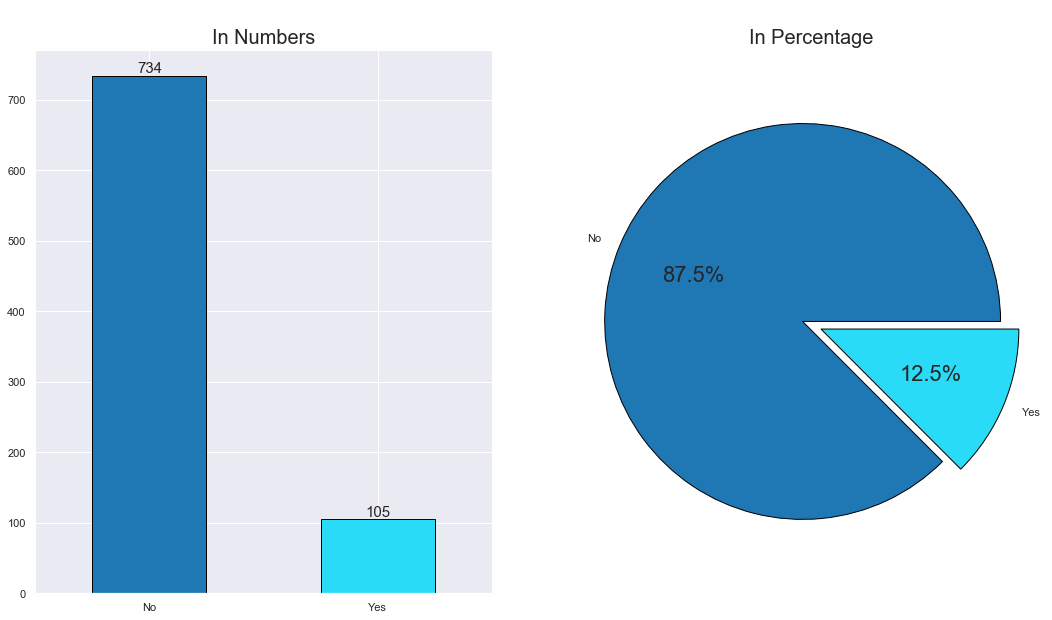

In [757]:
plt.rcParams.update({'font.size': 22})

# Group the main dataframe by Candidate and Progressive variables to be able to count unique candidates.
# Some candidates were endorsed by Progressive pacs and non-Progressive pacs. 
dem_unique = dem.groupby(['Candidate', 'Progressive']).count().reset_index()

# Drop rows that have the same candidate name and prorgessive value.
dem_unique = dem_unique.drop_duplicates(['Candidate', 'Progressive'], keep = 'last')

# Drop rows that have the same candidate name and keep the last, which is the 'Yes' value under the Progressive column
dem_unique = dem_unique.drop_duplicates('Candidate', keep = 'last')


# Plot figure with 1 row and 2 columns and insert inside the two diagrams
fig = plt.figure(figsize=(18,10))
# fig.suptitle('Progressive Candidates', fontsize=25)
display(HTML('<h3><font color="#84A3C1">Progressive Candidates <font color="#b4c93e">▼</font></h3>'));

# Barplot
plt.subplot(121)
colors = ['#1F77B4', '#2adbf7'] 
s = dem_unique['Progressive'].value_counts()
ax = s.plot.bar(color = colors, edgecolor='black') 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Progressive + 0.2 , v.Progressive,
        verticalalignment='bottom', horizontalalignment='center', fontsize=15)
plt.title("In Numbers", fontdict = {'fontsize' : 20})
plt.xticks(rotation = 0)

# Plot the percent of survivors
plt.subplot(122)
pie_chart = (dem_unique['Progressive'].value_counts()) # Create the array 'x' for the pie chart
colors = ['#1F77B4', '#2adbf7'] # Set the colors for the slices (2 in this case)
explode = (0, 0.1)
plt.pie(pie_chart, explode=explode, shadow=False, colors=colors, autopct='%1.1f%%', labels = ['No', 'Yes'], wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'black'})# Plot the pie chart
plt.axis('equal')  # make the chart look good (round)
plt.title('\nIn Percentage', size=20) # Give a title to the plot
xlocs, xlabs = plt.xticks()
plt.show()

The Progressives were 12.5% of the total candidates. 105 out of 839, compare to 734 non-Progressives.
How many Progressive candidates won? How did the Progressive pacs do, compare to non-Progressive pacs?
I will delve into that in the Bi-variate exploration. <font color="#b4c93e">▼</font>

## <font color='84A3C1'>Progressive and Won</font> 
How many Progressive candidates won the primaries? <font color="#b4c93e">▼</font>

In [758]:
# Number of all candidates who won
all_endorsed = dem.loc[(dem['value'] == 'Yes')]
all_endorsed = all_endorsed.drop_duplicates(['Candidate', 'Progressive'], keep = 'last')


# Number of all candidates (unique)
all_can = dem['Candidate'].unique()


# Number of Progressive candidates who won
# Group by Candidate and Progressive
pro_win = dem.groupby(['Candidate', 'Progressive', 'Won']).count().reset_index()
pro_ran = dem.groupby(['Candidate', 'Progressive', 'Won']).count().reset_index()

# # Drop rows that have the same candidate name and prorgessive value.
pro_win = pro_win.drop_duplicates(['Candidate', 'Progressive'], keep = 'last')
pro_ran = pro_win.drop_duplicates(['Candidate', 'Progressive'], keep = 'last')

# # Drop rows that have the same candidate name and keep the last, which is the 'Yes' value under the Progressive column
pro_win = pro_win.drop_duplicates('Candidate', keep = 'last')
pro_ran = pro_win.drop_duplicates('Candidate', keep = 'last')

# # Filter to find only winning progressives
pro_win = pro_win.loc[(pro_win['Won'] == 'Yes') & (pro_win['Progressive'] == 'Yes')]
pro_ran = pro_ran.loc[(pro_ran['Progressive'] == 'Yes')]


print("\n\033[37m\033[1mFrom","\033[92m\033[1m",len(all_endorsed['Candidate'].unique()),
      "\033[92m\033[0m","\033[37m\033[1mcandidates who received endorsements out of",
      "\033[92m\033[1m",len(all_can),"\033[92m\033[0m",
      "\033[37m\033[1munique candidates in the Democratic primaries of 2018\033[0m,",
      "\033[37m\033[1mthere were","\033[92m\033[1m",len(pro_win['Candidate'].unique()),
      "\033[92m\033[0m","\033[37m\033[1mProgressive winnings out of",
      "\033[92m\033[1m",len(pro_ran['Progressive']),"\033[92m\033[0m",
      "\033[37m\033[1mProgressive candidates who ran.",
      "That is a", round(len(pro_win['Candidate'].unique())/len(dem[dem['Progressive'] == 'Yes'])*100, 1), 
      "percent of success for the Progressive movement with winning the Democratic primaries.\033[0m")
display(HTML('<font color="#b4c93e">▼</font>'));


From  311  candidates who received endorsements out of  839  unique candidates in the Democratic primaries of 2018, there were  34  Progressive winnings out of  105  Progressive candidates who ran. That is a 24.1 percent of success for the Progressive movement with winning the Democratic primaries.


* Note that the number of Progressives winnings might be larger in reality, since there might have been candidates that were Progressives but did not receive an endorsement from a Progressive pac. <font color="#b4c93e">▼</font>

## <font color='#84A3C1'>Endorsements Won and Progressive</font>
How many winnings the Progressive pacs had and which one had the best convertion rate? <font color="#b4c93e">▼</font>

,Pac,Percent Success,Winnings,Endorsements
0,PCCC Endorsed?,63.6,7,11
1,Justice Dems Endorsed?,31.2,15,48
2,Our Revolution Endorsed?,29.3,24,82


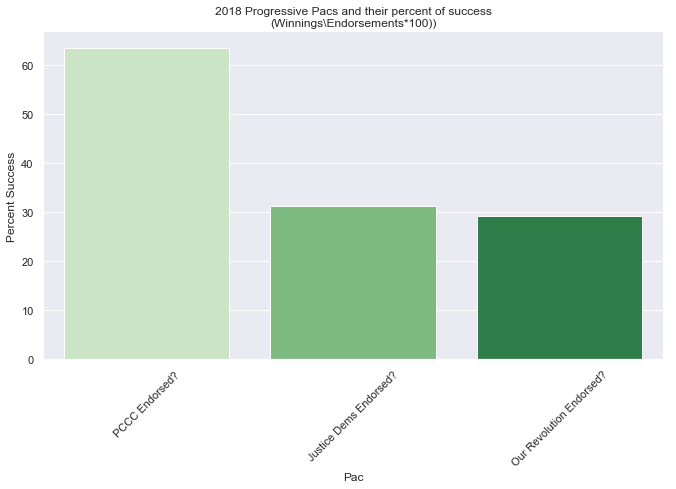

In [759]:
# Find all endorsements for each pac
endors_yes = dem[dem['value'] == 'Yes']
endors_yes = dem[dem['Progressive'] == 'Yes']
endors_yes = dem['Endorsements'].value_counts()

# # Find number of successful endorsements for each pac
endors_yes_won = dem[(dem['Won'] == 'Yes') & (dem['Endorsements'] != 'No') &(dem['Progressive'] == 'Yes')]
endors_yes_won = endors_yes_won['Endorsements'].value_counts()

# # Find the number of successes for each endorsing pac
endors_success = round(endors_yes_won / endors_yes * 100, 1).sort_values(ascending=False)

# # Endorsers Success table
# # Create an empty data frame with just desired column names
success = pd.DataFrame(columns = ['Percent Success', 'Winnings', 'Endorsements'])

# # Put series value inside data frame using mapping concept
success['Percent Success'] = endors_success
success['Winnings'] = endors_yes_won
success['Endorsements'] = endors_yes

# Drop NA line
success = success.dropna()

# Name the index column
success.index.name = 'Pac'

# reset the index
success.reset_index(inplace = True)

# Plot percent success
per_success = sb.catplot(x="Pac", y="Percent Success", palette = 'Greens', data=success, kind='bar');
per_success.fig.set_size_inches(12,6)
plt.title("2018 Progressive Pacs and their percent of success\n(Winnings\Endorsements*100))")
plt.xticks(rotation = 45);

# Number of Progressive candidates who won
pro_win = dem.loc[(dem['Won'] == 'Yes') & (dem['Progressive'] == 'Yes')]

# print("\033[37m\033[1mWinnings for Progressive pacs\033[0m\n", pro_win['Endorsements'].value_counts())
display(HTML('<font color="#b4c93e">▼</font>'));

# Print table
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #cae0a8' if v else '' for v in is_max]
success.style.apply(highlight_max, subset=['Percent Success','Winnings', 'Endorsements'])


We can clearly see that the Progressive Change Campaign Committee (PCCC) had the best converstion rate of 64%, which was 7 winnings out of 11 endorsements. Nevertheless, the pac that had the highest number of covertions was Our Revolution, which spun out of Senator Bernie Sanders's 2016 presidential campaign, with 24 winnings out of 82 endorsements. Justice Democrats, which was created 2 months after the 2016 elections by individuals from Secular Talk, TYT and few Bernie's Campaign leaders, had a success rate of 31% with 15 winnings out of 48 endorsements. <font color="#63BDEF">►</font>

## <font color='7466fa'>State Distribution</font>
Which states had the highest number of candidates? <font color="#b4c93e">▼</font>

In [760]:
us_state_abbrev = {
    'Alabama': 'AL',    'Alaska': 'AK',    'Arizona': 'AZ',    'Arkansas': 'AR',    'California': 'CA',    'Colorado': 'CO',    'Connecticut': 'CT',    'Delaware': 'DE',    'Florida': 'FL',    'Georgia': 'GA',    'Hawaii': 'HI',    'Idaho': 'ID',    'Illinois': 'IL',    'Indiana': 'IN',    'Iowa': 'IA',    'Kansas': 'KS',    'Kentucky': 'KY',    'Louisiana': 'LA',    'Maine': 'ME',    'Maryland': 'MD',    'Massachusetts': 'MA',    'Michigan': 'MI',    'Minnesota': 'MN',    'Mississippi': 'MS',
    'Missouri': 'MO',    'Montana': 'MT',    'Nebraska': 'NE',    'Nevada': 'NV',    'New Hampshire': 'NH',    'New Jersey': 'NJ',    'New Mexico': 'NM',    'New York': 'NY',    'North Carolina': 'NC',    'North Dakota': 'ND',    'Ohio': 'OH',    'Oklahoma': 'OK',    'Oregon': 'OR',    'Pennsylvania': 'PA',    'Rhode Island': 'RI',    'South Carolina': 'SC',    'South Dakota': 'SD',    'Tennessee': 'TN',    'Texas': 'TX',    'Utah': 'UT',    'Vermont': 'VT',    'Virginia': 'VA',    'Washington': 'WA',    'West Virginia': 'WV',    'Wisconsin': 'WI',    'Wyoming': 'WY',}

In [761]:
# State number of Officials
states_reps = pd.read_csv('states_reps.csv')
# Abbreviate state names
states_reps['State'].replace(to_replace=dict(us_state_abbrev), inplace=True)
states_reps = states_reps.sort_values('State', ascending=True)
# Adding 2 senators and 1 governor to each state's Officials column
states_reps['Officials'] = states_reps['Officials']  + 3


# Unique candidates in states
state_can_uniq = dem.drop_duplicates(['Candidate'], keep='first')
state_can_uniq = state_can_uniq.groupby('State')['Candidate'].count().reset_index()
state_can_uniq = pd.merge(state_can_uniq, states_reps, how='outer', on=['State'])
del state_can_uniq['Officials']
state_can_uniq.fillna(0, inplace=True)
state_can_uniq = state_can_uniq.sort_values('Candidate', ascending=False)

## Visuals

# Map of All states with their candidates
display(HTML('<h3><font color="#84A3C1">Map of the states with the number of candidates by state <font color="#b4c93e">▼</font></h3>'));

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
x = state_can_uniq.State
y = state_can_uniq.Candidate
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
# Data object
data = [go.Choropleth(        
        colorscale = scl,
        autocolorscale = False,
        locations = state_can_uniq['State'],
        z = state_can_uniq['Candidate'].astype(float),
        locationmode = 'USA-states',
        text = state_can_uniq['State'],
        marker = dict(
            line = dict(
                color = 'rgb(255,255,255)',
                width = 2)),
        colorbar = dict(
            title = "States and Candidates")
        )]
layout = go.Layout(yaxis = dict(title = 'Count'), 
                   xaxis = dict(title = 'State'),
                  geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, lakecolor = 'rgb(66, 165, 245)'))
fig = dict(data=data, layout=layout)
py.iplot(fig)

We can see from the above table, bar chart and map that Texas and California lead with the number of candidates, with 109 and 70 candidates respectively. They were followed by Pensilvenya, Ohaio and Ilinois with about 40 candidates each. Alaska, Hawaii, Masechusets, New Hampshire and Wayoming had no candidates in the 2018 Democratic primaries.<br>
Let's see how the Progressives distribution by state loos like. <font color="#b4c93e">▼</font>

## <font color="#7466fa">State and Progressives</font>
How many Progressives won in each state? <font color="#b4c93e">▼</font>

In [762]:
# State number of Officials
states_reps = pd.read_csv('states_reps.csv')
# Abbreviate state names
states_reps['State'].replace(to_replace=dict(us_state_abbrev), inplace=True)
states_reps = states_reps.sort_values('State', ascending=True)
# Adding 2 senators and 1 governor to each state's Officials column
states_reps['Officials'] = states_reps['Officials']  + 3

from IPython.display import IFrame

state_pro_uniq = dem.loc[dem['Progressive'] == 'Yes']
state_pro_uniq = state_pro_uniq.groupby('State')['Candidate'].count().reset_index()
state_pro_uniq = pd.merge(state_pro_uniq, states_reps, how='outer', on=['State'])
del state_pro_uniq['Officials']
state_pro_uniq.fillna(0, inplace=True)
state_pro_uniq.reset_index(drop=True, inplace=True)
state_pro_uniq.rename(columns={'Candidate': 'Progressives'}, inplace=True)
state_pro_uniq = state_pro_uniq.sort_values('Progressives', ascending=False)
state_pro_uniq = state_pro_uniq.reset_index()
del state_pro_uniq['index']

display(HTML('<h3><font color="#84A3C1">Map of the states with the number of Progressive candidates by state <font color="#b4c93e">▼</font></h3>'));

## MAP
# Map of All states with their candidates
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
# Data object
data = [go.Choropleth(        
        colorscale = scl,
        autocolorscale = False,
        locations = state_pro_uniq['State'],
        z = state_pro_uniq['Progressives'].astype(float),
        locationmode = 'USA-states',
        text = state_pro_uniq['State'],
        marker = dict(
            line = dict(
                color = '#000000',
                width = 1)),
        colorbar = dict(
            title = "States and Candidates")
        )]
layout = go.Layout(yaxis = dict(title = 'Count'), 
                   xaxis = dict(title = 'State'),
                  geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, lakecolor = 'rgb(66, 165, 245)'))
fig = dict(data=data, layout=layout)
py.iplot(fig)

There were 29 states with Progressive candidates out of 50. The leading states with Progressive candidate were Texas with 29 candidates, California with 15, Micigane with 12 and New York with 10. <font color="#b4c93e">▼</font>

## <font color='84A3C1'>Progressive Won and State</font>
How many Progressive candidates won in each state?

In [763]:
# Progressive winnings in states

display(HTML('<h3><font color="#84A3C1">Progressive candidates winnings in states <font color="#b4c93e">▼</font></h3>'));

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val > 0 else 'black'
    return 'color: %s' % color

# Dataframe 0 - State number of Officials
states_reps = pd.read_csv('states_reps.csv')
states_reps['State'].replace(to_replace=dict(us_state_abbrev), inplace=True)
states_reps = states_reps.sort_values('State', ascending=True)

# Adding 2 senators and 1 governor to each state's Officials column
states_reps['Officials'] = states_reps['Officials']  + 3
states_reps.reset_index(drop=True, inplace=True)


# Dataframe 1 - Unique candidates in states
state_can_uniq = dem.drop_duplicates(['Candidate'], keep='first')
state_can_uniq = state_can_uniq.groupby('State')['Candidate'].count()
state_can_uniq = pd.merge(state_can_uniq, states_reps, how='outer', on=['State'])
state_can_uniq = state_can_uniq.sort_values('State', ascending=True)
del state_can_uniq['Officials']
state_can_uniq.fillna(0, inplace=True)
state_can_uniq.reset_index(drop=True, inplace=True)
state_can_uniq.rename(columns={'Candidate': 'Candidates'}, inplace=True)


# Dataframe 2 - All winnings
state_all_win = dem.loc[(dem['Won'] == 'Yes')]
state_all_win = state_all_win.drop_duplicates(['Candidate'], keep='first')
state_all_win = state_all_win.groupby('State')['Candidate'].count()
state_all_win = pd.merge(state_all_win, states_reps, how='outer', on=['State'])
state_all_win = state_all_win.sort_values('State', ascending=True)
del state_all_win['Officials']
state_all_win.fillna(0, inplace=True)
state_all_win.reset_index(drop=True, inplace=True)
state_all_win.rename(columns={'Candidate': 'Candidates'}, inplace=True)


# Dataframe 3 - Progressives by state
state_pro = dem.loc[dem['Progressive'] == 'Yes']
state_pro = state_pro.drop_duplicates(['Candidate'], keep='first')
state_pro = state_pro.groupby('State')['Candidate'].count().reset_index()
state_pro = pd.merge(state_pro, states_reps, how='outer', on=['State'])
state_pro = state_pro.sort_values('State', ascending=True)
del state_pro['Officials']
state_pro.fillna(0, inplace=True)
state_pro.reset_index(drop=True, inplace=True)
state_pro.rename(columns={'Candidate': 'Progressives'}, inplace=True)


# Dataframe 4 - Progressives by state who won
state_pro_win = dem.loc[(dem['Won'] == 'Yes') & (dem['Progressive'] == 'Yes')]
state_pro_win = state_pro_win.fillna(0)
state_pro_win = state_pro_win.groupby('State')['Progressive'].count().reset_index()
state_pro_win = pd.merge(state_pro_win, states_reps, how='outer', on=['State'])
state_pro_win = state_pro_win.sort_values('State', ascending=True)
state_pro_win.rename(columns={'Progressive': 'Progressives'}, inplace=True)
del state_pro_win['Officials']
state_pro_win.fillna(0, inplace=True)
state_pro_win.reset_index(drop=True, inplace=True)


# Give stying to different dataframes
df1_styler = (state_can_uniq
              .style.set_table_attributes("style='display:inline'").set_caption('All candidates')
              .set_properties(subset=['State', 'Candidates'], **{'width': '90px', 'background-color': '#84A3C1','text-align': 'center'})
              .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')],
                                 'text-align': 'center'}]))

df2_styler = (state_all_win
              .style.set_table_attributes("style='display:inline'").set_caption('All wins')
              .set_properties(subset=['State', 'Candidates'], **{'width': '90px', 'background-color': '#96bacc','text-align': 'center'})
              .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')],
                                 'text-align': 'center'}]))

df3_styler = (state_pro
              .style.set_table_attributes("style='display:inline'").set_caption('Progressive candidates')
              .set_properties(subset=['State', 'Progressives'], **{'width': '90px', 'background-color': '#c0d9e5','text-align': 'center'})
             .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')],
                                 'text-align': 'center'}]))

df4_styler = (state_pro_win
              .style.set_table_attributes("style='display:inline'")
              .set_caption('Progressive wins')
              .applymap(color_negative_red, subset=['Progressives'])
              .apply(highlight_max, subset=['Progressives'])
              .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')]}])
              .set_properties(subset=['State', 'Progressives'], **{'width': '90px', 'background-color': '#daeaf2','text-align': 'center'}))

# Display the tables
display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True) #, 

,State,Candidates
0,AK,0
1,AL,16
2,AR,9
3,AZ,4
4,CA,70
5,CO,14
6,CT,2
7,DE,1
8,FL,10
9,GA,26


In the tables above we can see on the far left the number of available seats for each state (for the elections themselves, rather than the primaries); second table from the left we have the total number of uniue Democratic candidates; the third table brings all the Progressive candidates; and the last table shows us the number of Progressive winnings in each state.
Here is a summary of the states with Progressive wins, in a table, plot and a map: <font color="#b4c93e">▼</font>

## <font color="#84A3C1">Winning Progressives on the map by state</font> <font color="#b4c93e">▼</font>

In [764]:
# Map of All states with their candidates

from IPython.display import IFrame

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
# Data object
data = [go.Choropleth(        
        colorscale = scl,
        autocolorscale = False,
        locations = state_pro_win['State'],
        z = state_pro_win['Progressives'].astype(float),
        locationmode = 'USA-states',
        text = state_pro_win['State'],
        marker = dict(
            line = dict(
                color = '#000000',
                width = 1)),
        colorbar = dict(
            title = "States and Progressive wins")
        )]
layout = go.Layout(title = 'Map with Progressive candidates who won by state', yaxis = dict(title = 'Count'), 
                   xaxis = dict(title = 'State'),
                  geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, lakecolor = 'rgb(66, 165, 245)'))
fig = dict(data=data, layout=layout)
py.iplot(fig)

Texas was definitely the biggest winning state for Progressive in the 2018 Democratic primaries. Progressives won the primaries in 17 states. Texas lead with 11 candidates, followed by California and New York with 4 winnings and Michigan with 3 winnings.
Were those winnings meaningful, compare to the rest of the candidates population? What about compare to the number of Progressive candidates?

In [765]:
display(HTML('<h3><font color="#84A3C1">Success rate for Progressives <font color="#b4c93e">▼</font></h3>'));

# Merge th above 4 dataframes to find the percent of Progressives from all the candidates and from the winners in the primaries.
per_success = state_can_uniq.merge(state_pro, on='State').merge(state_all_win, on='State').merge(state_pro_win, on='State')
del per_success['State']
import numpy as np
def sumColumn(matrix):
    return np.sum(matrix, axis=0)  # axis=1 says "get the sum along the columns"
per_success = per_success.apply(sumColumn)

# Change the Pandas Series to a new dataframe
per_success = per_success.to_frame().reset_index().T

# Remove extra index row
per_success = per_success.iloc[1:]

# Set columns names
per_success.rename(columns={0:'All Candidates',1:'Progressive Candidates',2: 'All Wins', 3:'Progressive Wins'}, inplace=True) # should match the list order in S1
per_success.reset_index(drop=True,inplace=True) # reset the funky index
per_success['% from Population'] = per_success['Progressive Candidates']/per_success['All Candidates']*100
per_success['% success from Population'] = per_success['Progressive Wins']/per_success['All Candidates']*100
per_success['% success from Progressives'] = per_success['Progressive Wins']/per_success['Progressive Candidates']*100
per_success

,All Candidates,Progressive Candidates,All Wins,Progressive Wins,% from Population,% success from Population,% success from Progressives
0,839,105,264,46,12.5149,5.48272,43.8095


We can see that Progressive candidates comprised 12.5% of the total candidates population. This is 105 out of 839.
Progressives won in 46 different primaries from 264 combats that ended with winnings, which is 5.5% success rate.
From the Progressives population of 105, 44% succeeded with their primaries. <font color="#63BDEF">►</font>

## <font color="#b1db37">Race distribution (White and non-White)</font>
How does the race distribution looked like? Were there more White than non-White competing? <font color="#b4c93e">▼</font>

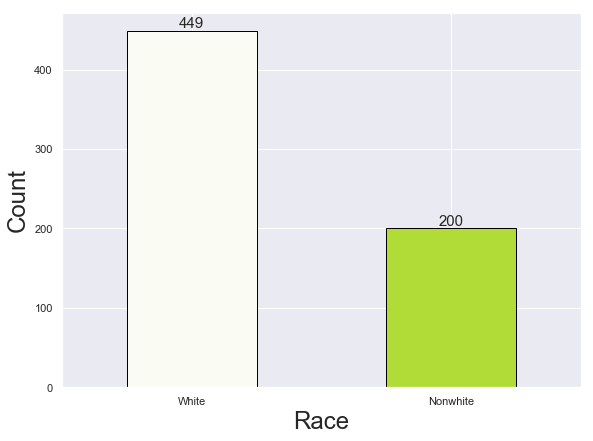

In [769]:
display(HTML('<h3><font color="#b1db37">White VS non-White <font color="#b4c93e">▼</font></h3>'));

dem_race = dem.drop_duplicates(['Candidate'], keep='first')

# plt.subplot(111)
colors = ['#fafcf4', '#b1db37']
s = dem_race['Race'].value_counts()
ax = s.plot.bar(color = colors, edgecolor='black') 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Race + 0.2 , v.Race,
        verticalalignment='bottom', horizontalalignment='center', fontsize=15)
plt.xticks(rotation = 0)
plt.xlabel('Race', fontsize=24)
plt.ylabel('Count', fontsize=24)
# plt.title("White VS non-White")
plt.subplots_adjust(left=1.8, bottom=0.6, right=3, top=1.9, wspace=None, hspace=None)

plt.show()



White candidates were the majority in those primaries. More than twice the number of non-White. Which pacs supported more Whites and which more non-White? <font color="#b4c93e">▼</font>

## <font color="#b1db37">Race and Endorsements</font>
Were there pacs that supported more non-White candidates than White candidates? <font color="#b4c93e">▼</font>

In [779]:
display(HTML('<h3><font color="#b1db37">Endorsements by Race <font color="#b4c93e">▼</font></h3>'));


# Find the endorsements by Race
endors_race = dem[(dem.Endorsements != 'No')]
endors_race = endors_race[endors_race['Race'].notnull()]

# Remove Biden and Sanders from this list since I imported most of their endorsements from a source without the 'Race' data.
endors_race = endors_race[endors_race['Endorsements'] != 'Biden Endorsed?']
endors_race = endors_race[endors_race['Endorsements'] != 'Sanders Endorsed?']

race_plot = endors_race.groupby(['Endorsements', 'Race']).count().reset_index()
race_plot = race_plot[['Endorsements', 'Race', 'Candidate']]
race_plot.sort_values(by='Candidate', ascending=False)

,Endorsements,Race,Candidate
3,Guns Sense Candidate?,White,127
9,Our Revolution Endorsed?,White,52
2,Guns Sense Candidate?,Nonwhite,39
7,Justice Dems Endorsed?,White,26
5,Indivisible Endorsed?,White,24
8,Our Revolution Endorsed?,Nonwhite,20
1,Emily Endorsed?,White,18
6,Justice Dems Endorsed?,Nonwhite,16
17,WFP Endorsed?,White,13
15,VoteVets Endorsed?,White,12


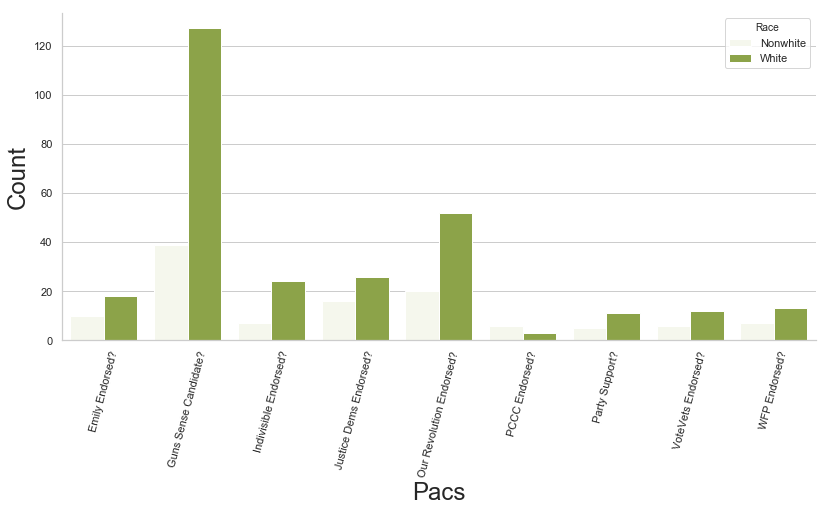

In [800]:
display(HTML('<h3><font color="#b1db37">Race and Pacs <font color="#b4c93e">▼</font></h3>'));

# Plot 
top_can_plot = sb.catplot(x="Endorsements", y="Candidate", color='#94b23a', aspect=.7, hue = 'Race', 
                          data=race_plot, kind='bar', legend_out=False);
top_can_plot.fig.set_size_inches(20, 6)
# plt.title("Endorsements and Race")
plt.xticks(rotation = 75);
plt.xlabel('Pacs', fontsize=24)
plt.ylabel('Count', fontsize=24);


Whites dominated those elections in each of the pacs, by far, except with the PCCC, where there were twice the number of non-whites than whites.  <font color="#63BDEF">►</font>

## <font color='4db4cc'>Vote Percent Distribution</font>
The percentage of the vote received by the candidate in his or her primary. <font color="#b4c93e">▼</font>

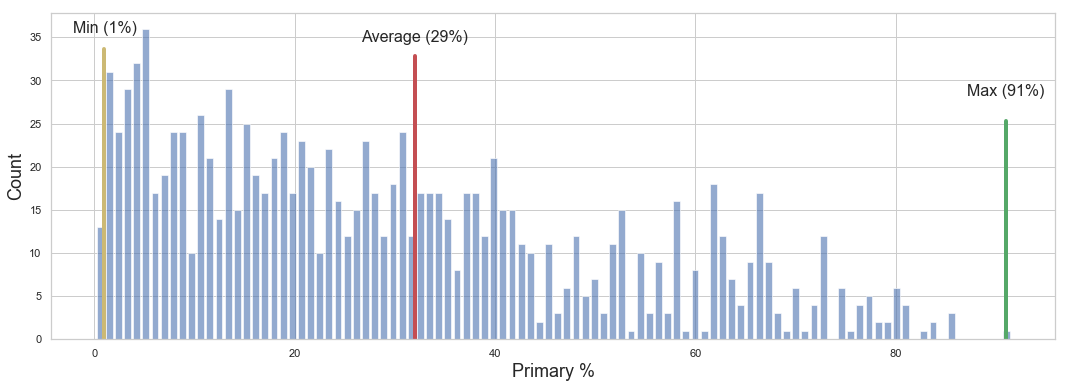

In [788]:
# Find average of percent success and print a table with colors where red is below average and green is above average.

# Set 2 colors (green and red) plus black
def color_green_red(value):
    if value < 35:
        color = 'red'
    elif value > 35:
        color = 'black'
    else:
        color = 'black'
    return 'color: %s' % color

# Set CSS properties for the elements in dataframe
# Table Header
th_props = [
    ('font-size', '12px'),
    ('text-align', 'center'),
    ('font-weight', 'bold'),
    ('color', '#6d6d6d'),
    ('background-color', '#f7f7f9')]

# Set CSS properties for td elements in dataframe
# Table Data
td_props = [
    ('font-size', '12px')]

# Set table styles
styles = [
    dict(selector="th", props=th_props),
    dict(selector="td", props=td_props)]

# Table Data Color
# Set colormap equal to seaborns light green color palette
cm = sb.light_palette("green", as_cmap=True)

# Apply value display formatting to the dataframe (colors)
f = (dem.style
 .background_gradient(cmap=cm, subset=['Primary %'])
 .highlight_max(subset=['Primary %'])
 .set_caption('<h2><center> \'Primary %\' - The percentage of the vote received by the candidate in his or her primary<br>(red is below average)</center></h2>')
 .set_table_styles(styles)
 .applymap(color_green_red, subset=['Primary %']))
# f


## Plot the distribution of the Primary Percent variable
# Drop NAs
primary_per = dem.dropna(subset = ['Primary %'])

# Remove the 100% percenters, which were appointed more than elected from the lack of contenders.
primary_per = primary_per[primary_per['Primary %'] != 100]

# Plot
#sb.set_style("whitegrid")#, {'axes.labelcolor': '#4db4cc'})
plt.figure(figsize=(18,6))
plt.ylabel('Count', fontsize=18)
plt.xlabel('Primary Percent', fontsize=18)

# Draw a line with the min
plt.axvline(1, 0,0.89, linewidth=4, color='y')
plt.text(1, 36, 'Min (1%)', ha='center', va='center',rotation='horizontal', size=16)

# Draw a line with the average
plt.axvline(32, 0,0.87, linewidth=4, color='r')
plt.text(32, 35, 'Average (29%)', ha='center', va='center',rotation='horizontal', size=16)

# Draw a line with the max
plt.axvline(91, 0,0.67, linewidth=4, color='g')
plt.text(91, 28.7, 'Max (91%)', ha='center', va='center',rotation='horizontal', size=16)
display(HTML('<h3><font color="#4db4cc">Percentages of support for all candidates <font color="#b4c93e">▼</font></h3>'));

# plt.title("percentages of support for all candidates", fontdict = {'fontsize' : 20})
sb.distplot(primary_per['Primary %'], bins=100, kde=False, hist_kws={"rwidth":0.75, 'alpha':0.6});

As the above graph show us there were a lot of candidates who received lower percentages of the primary votes and there were less candidates who received high voting support (higher percentage). How does the turnaround statistics for only the winners looks like? <font color="#b4c93e">▼</font>

## <font color='4db4cc'>Percent and Won</font>
How does the turnaround statistics for only the winners looks like? <font color="#b4c93e">▼</font>

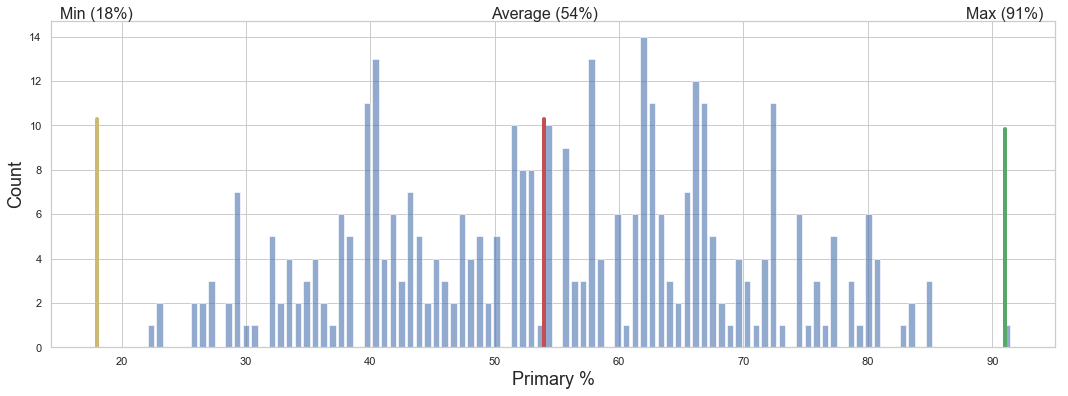

In [790]:
# Drop NAs
primary_per_win = dem.dropna(subset = ['Primary %'])

# Filter to have only winners
primary_per_win = primary_per_win[(primary_per_win.Won == 'Yes')]

primary_per_win
# Remove the 100% percenters, which were appointed more than elected from the lack of contenders.
primary_per_win = primary_per_win[primary_per_win['Primary %'] != 100]

# Plot
sb.set_style("whitegrid")#, {'axes.labelcolor': '#4db4cc'})
plt.figure(figsize=(18,6))
plt.ylabel('Count', fontsize=18)
plt.xlabel('Primary Percent', fontsize=18)

# Draw a line with the min
plt.axvline(18, 0,0.70, linewidth=4, color='y')
plt.text(18, 15, 'Min (18%)', ha='center', va='center',rotation='horizontal', size=16)

# Draw a line with the average
plt.axvline(54, 0,0.70, linewidth=4, color='r')
plt.text(54, 15, 'Average (54%)', ha='center', va='center',rotation='horizontal', size=16)

# Draw a line with the max
plt.axvline(91, 0,0.67, linewidth=4, color='g')
plt.text(91, 15, 'Max (91%)', ha='center', va='center',rotation='horizontal', size=16)
display(HTML('<h3><font color="#4db4cc">Percentages of support for the winning candidates <font color="#b4c93e">▼</font></h3>'));

# plt.title("Percentages of support for the winning candidates", fontdict = {'fontsize' : 20})
sb.distplot(primary_per_win['Primary %'], bins=100, kde=False, hist_kws={"rwidth":0.75, 'alpha':0.6});


We can see above that the average winning percent support candidates received was 54%.
The minimum percent of support a winning candidate had was 18% and the max was 91%. Note that there were candidates who receivd 100% in the dataset, which were not competing in the primaries, rather nominated. Thus those 100 percenters are not included in this graph.<br>
So, was there a correlation between the percent support a candidate received and winning the primary?<font color="#b4c93e">▼</font>

In [808]:
# Check for correlation
display(HTML('<h3><font color="#4db4cc">Correlation between Percent Support and Winning <font color="#b4c93e">▼</font></h3>'));

# Drop NAs
dem_win_lose = dem.copy()
dem_win_lose = dem_win_lose.dropna(subset = ['Primary %', 'Won'])
# Create a new columns 'Win' as an integer
dem_win_lose['Win'] = dem_win_lose['Won'].map({'Yes': 1, 'No': 0}).astype(int)

# Turn the 'Primary %' column an integer as well
dem_win_lose['Primary %'] = dem_win_lose['Primary %'].astype(int)

# Print the correlation coefficient
print(np.corrcoef(dem_win_lose['Primary %'], dem_win_lose['Win']))

[[1.         0.79483998]
 [0.79483998 1.        ]]


Correlation coefficient of 0.79 tells us that there is a pretty strong correlation between the two variables. It is normal that higher support percents will end up with winnings and lowers with defeats. <font color="#b4c93e">▼</font>

## <font color='4db4cc'>Primary Percent and Progressive</font>
Did Progressives have a better percent of support by votes they received in their respective primaries? <font color="#b4c93e">▼</font>

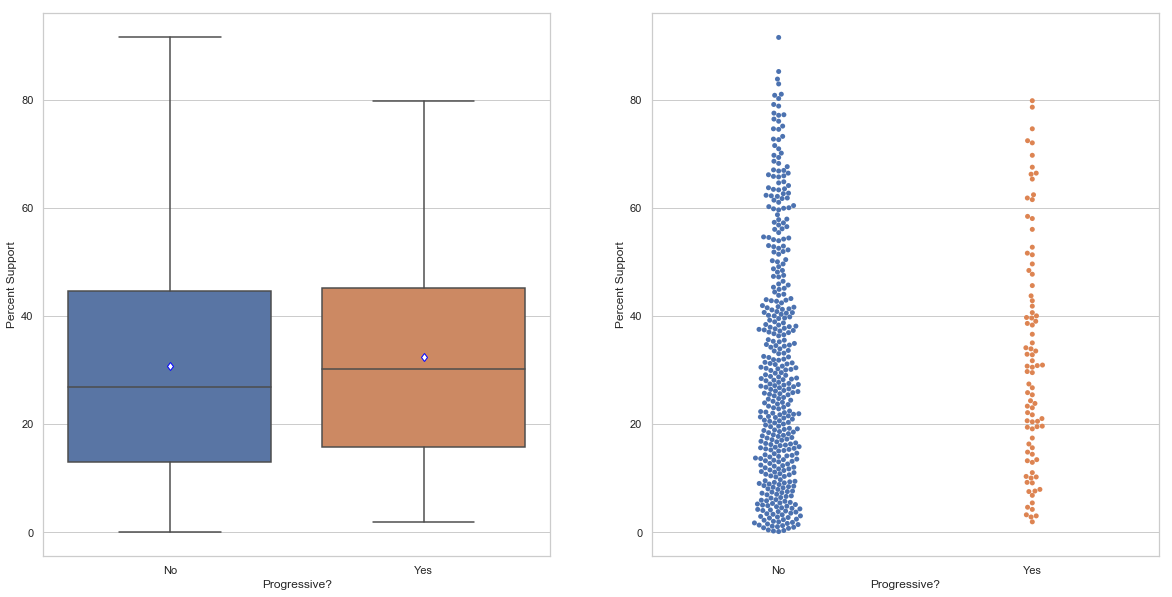

,count,mean,std,min,25%,50%,75%,max
Progressive,,,,,,,,
No,396.0,30.691246,21.843052,0.1,12.925,26.85,44.525,91.5
Yes,90.0,32.338889,20.776254,1.9,15.775,30.10,45.125,79.8


In [795]:
# Create a new dataframe
pro_percent = dem.groupby(['Candidate', 'Progressive'])['Primary %'].mean().reset_index()
pro_percent = pro_percent.drop_duplicates(['Candidate'], keep = 'last')
pro_percent = pro_percent[pro_percent['Primary %'] != 100]
pro_percent = pro_percent.groupby(['Progressive', 'Primary %']).count().reset_index()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
# fig.suptitle('Progressive and non-Progressive percent of votes', fontsize=30)
display(HTML('<h3><font color="#4db4cc">Progressive and non-Progressive percent of votes <font color="#b4c93e">▼</font></h3>'));

# progressive_support
plt.subplot(1,2,1)
sb.boxplot(x="Progressive", y="Primary %", data=pro_percent, showmeans=True, 
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"}).set(
    xlabel='Progressive?', ylabel='Percent Support')

# party_support
plt.subplot(1,2,2)
sb.swarmplot(x="Progressive", y="Primary %", data=pro_percent,
          ).set(
    xlabel='Progressive?', 
    ylabel='Percent Support'
)

plt.show()
pro_percent.groupby('Progressive')['Primary %'].describe()

We can see above 2 plots that compare the distrbution of the percent of votes received by Progressive and non-Progressive candidates. The percent of votes candidates received seems to be distributed similarly in the two groups, by both the Boxplot and Swarm plot. In the Swarmplot We can see also that there are less dots (observations) that represent Progressives, which is normal since we had less Progressives competing in the different primary races than non-Progressives.
Looking at the above table with the statistics of the Progressive and Primary Percent, we can see that the average and median are not very different between the two groups. So, we can say that Progressives did not have overall a better voting rate in those primaries. <br>
Let's check now how the Progressives did as one pac (joining the 3 Progressive pacs together). <font color="#b4c93e">▼</font>

## <font color='#4db4cc'>Endorsements Primary Percent and Progressive</font>
How did the Progessive pacs do, as one, compare to their main opponent in the Democratic Party, the Party Establishment, repesented here as "Party Support"? <font color="#b4c93e">▼</font>

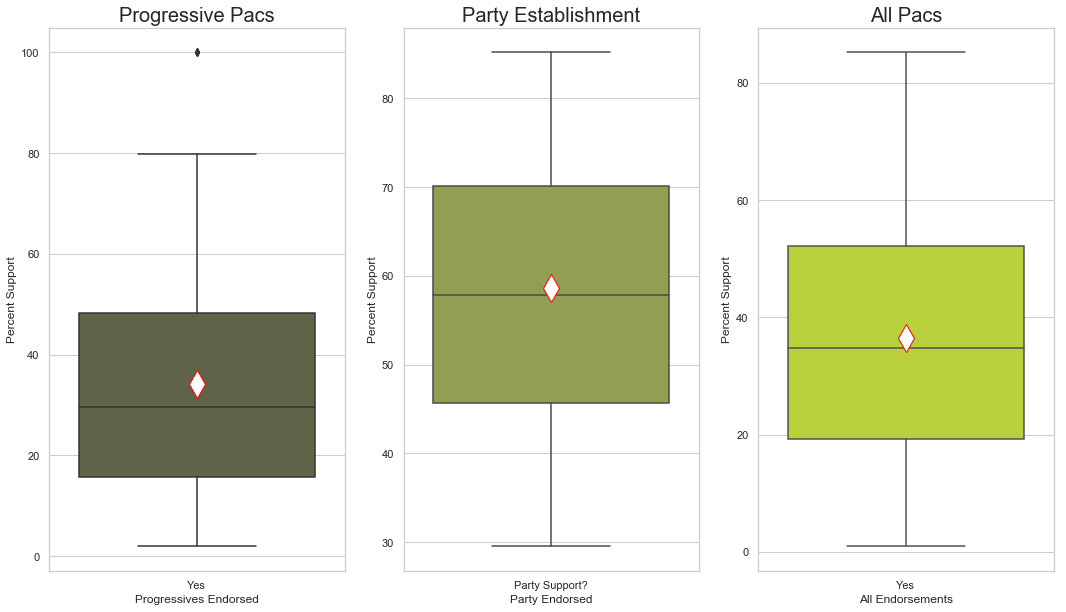

In [815]:
# Progressive Endorsements Support
progressive_support = dem[(dem['Endorsements'] == 'Justice Dems Endorsed?') | (
    dem1['Endorsements'] == 'PCCC Endorsed?') | (dem1['Endorsements'] == 'Our Revolution Endorsed?')]

# Drop NAs from the Primary Percent column
progressive_support = progressive_support.dropna(subset=['Primary %'])

# Put the Progressive pacs together
progressive_support.loc[:, 'Endorsements'] = 'Progressive Support?'

# Drop duplicates from the Candidate column
progressive_support = progressive_support.drop_duplicates(['Candidate'], keep = 'last')



# Party Endorsements Support
party_support = dem1[(dem1['Endorsements'] == 'Party Support?')]

# Drop duplicates from the Candidate column
progressive_support = progressive_support.drop_duplicates(['Candidate'], keep = 'last')

# Drop NAs from the Primary Percent column
party_support = party_support.dropna(subset=['Primary %'])



# All Endorsements Support
all_support = dem1.dropna(subset=['Primary %'])
all_support = all_support[(all_support['Endorsements'] != 'Party Support?') &
                          (all_support['Endorsements'] != 'Party Support?') &
                          (all_support['Endorsements'] != 'Justice Dems Endorsed?') &
                          (all_support['Endorsements'] != 'PCCC Endorsed?') &
                          (all_support['Endorsements'] != 'Party Support?') &
                          (all_support['Endorsements'] != 'Our Revolution Endorsed?')]

# Add a demi column to plot the entire column with 'Yes'
all_support.loc[:,'Endorsed'] = 'Yes' 

# Drop duplicates from the Candidate column
progressive_support = progressive_support.drop_duplicates(['Candidate'], keep = 'last')

# Drop NAs from the Primary Percent column
party_support = party_support.dropna(subset=['Primary %'])



# Plot
fig = plt.figure(figsize=(18,10))
# fig.suptitle('Percent support by Endorsements', fontsize=20)
display(HTML('<h3><font color="#4db4cc">Percent support by Endorsements <font color="#b4c93e">▼</font></h3>'));

# progressive_support
plt.subplot(131)
sb.boxplot(x='Progressive', y = 'Primary %', data = progressive_support, showmeans=True, color="#636843",
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"red", 
                     "markersize":"20"}).set(xlabel='Progressives Endorsed', ylabel='Percent Support')
plt.title('Progressive Pacs', fontsize=20)

# party_support
plt.subplot(132)
sb.boxplot(x='Endorsements', y = 'Primary %', data = party_support, showmeans=True, color="#9baa46",
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"red", 
                     "markersize":"20"}).set(
    xlabel='Party Endorsed', 
    ylabel='Percent Support'
)
plt.title('Party Establishment', fontsize=20)

# all_support
plt.subplot(133)
sb.boxplot(x='Endorsed', y = 'Primary %', data = all_support, showmeans=True, color="#cae822",
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"red", 
                     "markersize":"20"}).set(
    xlabel='All Endorsements', 
    ylabel='Percent Support'
)
plt.title('All Pacs', fontsize=20)

plt.show()



Comparing the distribution of the percent support candidates received between the Party Support and the Progressive pacs, we can see that the Party performed better than the Progressive pacs. The average for the party, with 68%, is twice as high as the Progressive one, with 35% support. <br>
How did it look like when adding the Race variable? <font color="#b4c93e">▼</font>

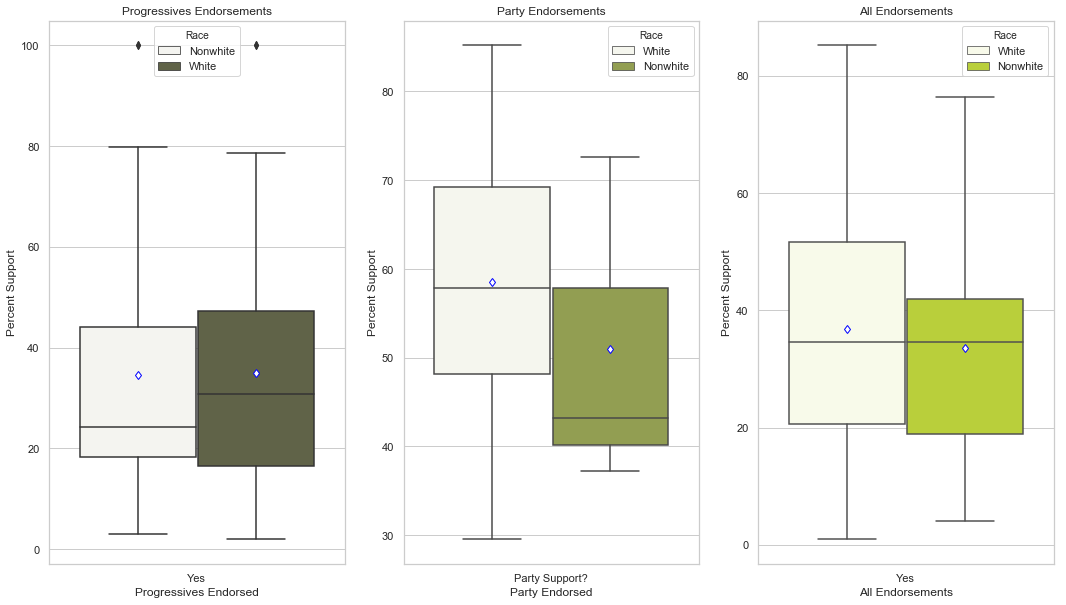

In [814]:
display(HTML('<h3><font color="#4db4cc">Percent support by Endorsements and Race <font color="#b4c93e">▼</font></h3>'));


# Plot
plt.figure(figsize=(18,10))

# progressive_support
plt.subplot(131)
sb.boxplot(x='Progressive', y = 'Primary %', data = progressive_support, showmeans=True, color="#636843", hue='Race',
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"}).set(xlabel='Progressives Endorsed', ylabel='Percent Support')
plt.title('Progressives Endorsements')

# party_support
plt.subplot(132)
sb.boxplot(x='Endorsements', y = 'Primary %', data = party_support, showmeans=True, color="#9baa46", hue='Race',
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"}).set(
    xlabel='Party Endorsed', 
    ylabel='Percent Support'
)
plt.title('Party Endorsements')

# all_support
plt.subplot(133)
sb.boxplot(x='Endorsed', y = 'Primary %', data = all_support, showmeans=True, color="#cae822", hue='Race',
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"}).set(
    xlabel='All Endorsements', 
    ylabel='Percent Support'
)
plt.title('All Endorsements')

plt.show()

We can see above that the Party Support pac not only had more white candidates, but also had a much higher average and performnce in general than non-Whites in the party.
Whites also lead the vote percent in the Progressive pacs.  <font color="#63BDEF">►</font>

## Conclusion